In [1]:
import matplotlib.pyplot as plt
from torch import  nn
import torch
import torch.nn.functional as F

In [52]:
class neural_classification(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=5,out_features=100)
        self.layer2 = nn.Linear(in_features=100,out_features=100)
        self.layer3 = nn.Linear(in_features=100,out_features=2)
    def forward(self,x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x =self.layer3(x)
        return x

In [6]:
import pandas as pd
import seaborn as sns

In [4]:
titanic_data_train = pd.read_csv("C:\\Users\\jains\\Desktop\\pytorch\\Datasets\\titanic\\train.csv")

In [5]:
titanic_data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic_data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic_data_train.shape

(891, 12)

In [10]:
 y = titanic_data_train["Survived"]

<Axes: xlabel='Survived', ylabel='count'>

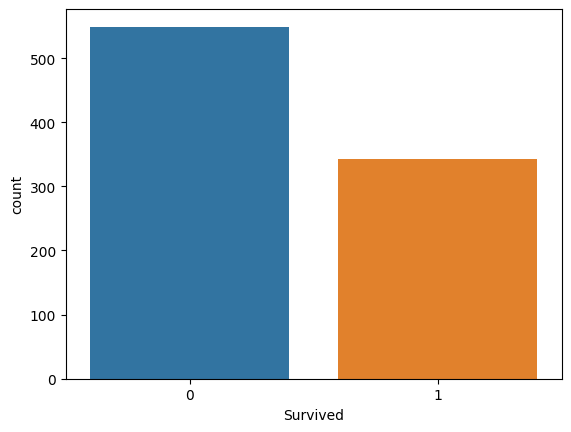

In [15]:
sns.countplot(x="Survived",data=titanic_data_train)

<Axes: xlabel='Sex', ylabel='Survived'>

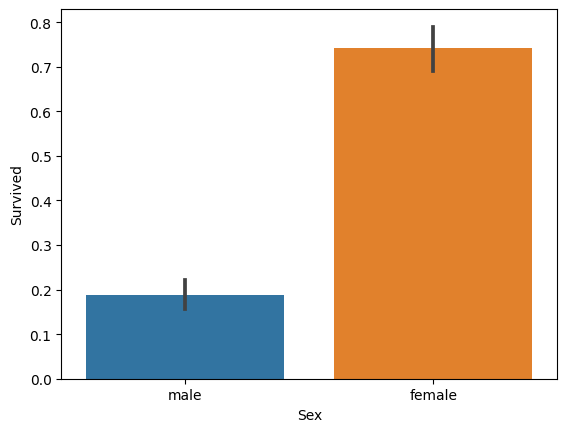

In [16]:
sns.barplot(x=titanic_data_train["Sex"],y=titanic_data_train["Survived"])

In [26]:
titanic_data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [24]:
# titanic_data_train.drop("Name",axis=1,inplace=True)
# titanic_data_train.drop("Ticket",axis=1,inplace=True)
titanic_data_train.drop("Cabin",axis=1,inplace=True)

In [21]:
titanic_data_train["Age"].fillna(titanic_data_train["Age"].mean(),inplace=True)

In [25]:
titanic_data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [31]:
titanic_data_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [32]:
titanic_data_train["Embarked"].fillna("S",inplace=True)

In [33]:
titanic_data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [35]:
titanic_data_train["Sex"] = titanic_data_train["Sex"].map({"male":0,"female":1})

In [37]:
titanic_data_train["Embarked"] = titanic_data_train["Embarked"].map({"S":0,"C":1,"Q":2})

In [38]:
from sklearn.metrics import  confusion_matrix

corr = titanic_data_train.corr()

<Axes: >

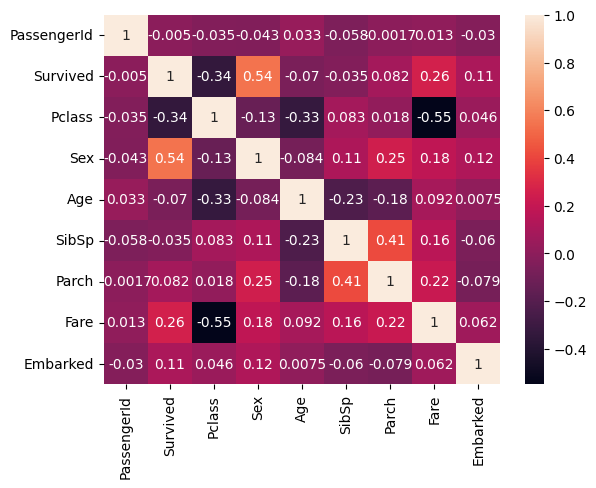

In [69]:
sns.heatmap(corr,annot=True)

In [47]:
titanic_data_train.drop(["PassengerId","Pclass","Fare"],axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c94edfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c94f8520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c94edd00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c94f8a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c94f8d00>],
 'means': []}

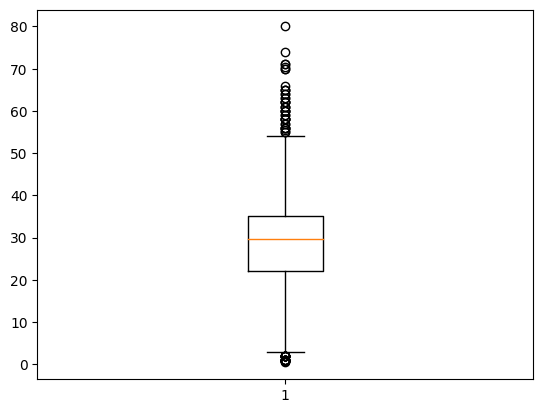

In [44]:
plt.boxplot(titanic_data_train["Age"])

In [48]:
X = titanic_data_train.drop("Survived",axis=1).values
y = titanic_data_train["Survived"].values

In [49]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
X_train.shape

(712, 5)

In [53]:
model =neural_classification()

In [56]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [54]:
#Hyper Parameters

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [57]:
epochs =100
torch.manual_seed(42)
final_loss = []

for epoch in range(epochs):
    y_pred = model(X_train)
    loss = loss_func(y_pred,y_train)
    final_loss.append(loss.detach().numpy())
    if epoch%10 == 0:
        print(f"Epoch:{epoch}  and the loss is {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch:0  and the loss is 1.238969087600708
Epoch:10  and the loss is 0.7081187963485718
Epoch:20  and the loss is 0.662070631980896
Epoch:30  and the loss is 0.6318424344062805
Epoch:40  and the loss is 0.6088191866874695
Epoch:50  and the loss is 0.584434449672699
Epoch:60  and the loss is 0.559566855430603
Epoch:70  and the loss is 0.5339783430099487
Epoch:80  and the loss is 0.5095264315605164
Epoch:90  and the loss is 0.4900786578655243


In [61]:
model.eval()
predictions = []
with torch.inference_mode():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [62]:
cm =confusion_matrix(y_test,predictions)

<Axes: >

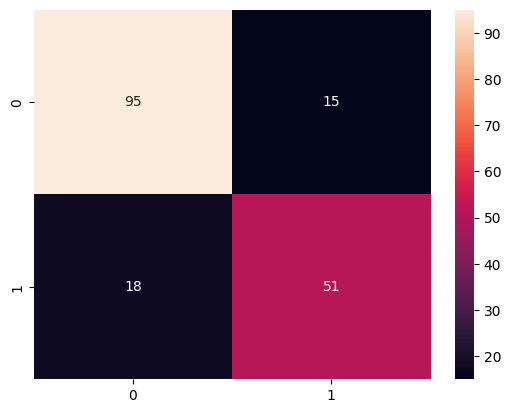

In [63]:
sns.heatmap(cm,annot=True)

In [65]:
score = accuracy_score(y_test,predictions)

In [67]:
print(f"The accuracy is {score*100}")

The accuracy is 81.56424581005587
